In [1]:
# Importing the numpy library for numerical operations
import numpy as np

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the datetime module for handling dates and times
from datetime import datetime

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing the matplotlib.pyplot module for creating plots
import matplotlib.pyplot as plt

# Setting pandas options to suppress chained assignment warnings
pd.options.mode.chained_assignment = None

# Importing the LabelEncoder from sklearn for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Importing the warnings module to handle warnings
import warnings

# Suppressing all warnings within the context
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('../dataset/final_dataset/trn_tst.csv')

# Display the first few rows of the DataFrame
df.head()


,latitude,longitude,depth,magnitude,distance,gravity,force
0,-26.803,-63.136,576.8,7.00,380543,9.82,2.258039e-15
1,-26.851,-63.217,592.9,5.78,380548,9.79,2.257980e-15
2,-59.414,-24.469,35.0,5.10,383580,9.79,2.222425e-15
3,-4.458,101.428,21.6,5.70,384394,9.80,2.213022e-15
4,-38.355,-73.326,24.0,7.20,385093,9.79,2.204996e-15


### Data Prepration:

In [3]:
# Print the column names of the DataFrame 'df'
print(df.columns)


Index(['latitude', 'longitude', 'depth', 'magnitude', 'distance', 'gravity',
       'force'],
      dtype='object')


In [4]:
df = df[df['magnitude']< 8]
df

,latitude,longitude,depth,magnitude,distance,gravity,force
0,-26.8030,-63.1360,576.800,7.00,380543,9.82,2.258039e-15
1,-26.8510,-63.2170,592.900,5.78,380548,9.79,2.257980e-15
2,-59.4140,-24.4690,35.000,5.10,383580,9.79,2.222425e-15
3,-4.4580,101.4280,21.600,5.70,384394,9.80,2.213022e-15
4,-38.3550,-73.3260,24.000,7.20,385093,9.79,2.204996e-15
...,...,...,...,...,...,...,...
18054,23.6212,121.3245,7.200,5.10,405624,9.78,1.987429e-15
18055,8.4722,127.4450,10.000,5.10,405776,9.78,1.985941e-15
18056,41.1985,78.6388,10.000,5.70,405610,9.81,1.987567e-15
18057,-56.0010,-27.6187,102.026,5.10,405069,9.79,1.992879e-15


#### checking null entries

In [5]:
# Calculate the percentage of missing values in each column of the DataFrame 'df'
# 'df.isnull().sum()' gives the number of missing values in each column
# 'len(df)' gives the total number of rows in the DataFrame
# Multiplying by 100 gives the percentage of missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Display the percentage of missing values for each column
missing_percentage


latitude     0.0
longitude    0.0
depth        0.0
magnitude    0.0
distance     0.0
gravity      0.0
force        0.0
dtype: float64

In [6]:
df.shape

(18046, 7)

# spliting dataset in to train and test sets 

In [7]:
# Separate the features and the target variable
# 'X' will contain all columns except 'magnitude'
X = df.drop('magnitude', axis=1)

# 'y' will contain only the 'magnitude' column
y = df['magnitude']


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Importing StandardScaler from sklearn for feature scaling
# taset into training and testing sets
# 'X_train' and 'y_train' will be used for training the model
# 'X_test' and 'y_test' will be used for testing the model
X_eval, X_other, y_eval, y_other = train_test_split(X, y, test_size=0.9, random_state=101)

X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, test_size=0.30, random_state=101)

In [9]:
total_samples = len(df)
train_percentage = (len(X_train) / total_samples) * 100
eval_percentage = (len(X_eval) / total_samples) * 100
test_percentage = (len(X_test) / total_samples) * 100

# Print shapes and percentages
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print(f'Training set percentage: {train_percentage:.2f}%')

print('X_eval:', X_eval.shape)
print('y_eval:', y_eval.shape)
print(f'Evaluation set percentage: {eval_percentage:.2f}%')

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print(f'Test set percentage: {test_percentage:.2f}%')

X_train: (11369, 6)
y_train: (11369,)
Training set percentage: 63.00%
X_eval: (1804, 6)
y_eval: (1804,)
Evaluation set percentage: 10.00%
X_test: (4873, 6)
y_test: (4873,)
Test set percentage: 27.00%


In [10]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
### STANDARD SCALER
# Initialize the StandardScaler to standardize the features

    # FIT STANDERDSCALER AND TRANSOFRM
    # Fit the scaler on the training data and transform both training and testing data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

# Split the da


In [11]:


# Importing metrics for model evaluation from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# performance evaluaton function
def per_eval(grid, y_test, title):
    # Make predictions using the testing data
    preds = grid.predict(X_test)
    # Get the best model from GridSearchCV
    best_rf_model = grid.best_estimator_
    
    # MEAN ABSOLUTE ERROR (MAE)
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, preds)
    
    # MEAN SQUARED ERROR (MSE)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, preds)
    
    # ROOT MEAN SQUARED ERROR (RMSE)
    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    # R^2 SCORE
    # Calculate R^2 Score
    r2 = r2_score(y_test, preds)
    
    # Print model evaluation metrics
    print(f'Model Evaluation: {title}')
    print("Best parameters found: ", grid.best_params_)
    print("Best score from cross-validation: ", grid.best_score_)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.histplot(y_test - preds, kde=True, color='blue', bins=30)
    plt.title(f'Residuals Distribution of {title}', fontsize=15)
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()



In [12]:
# this function is to evaluate features
def fea_eval_1(grid, X, title):
    # Extract feature importances from the best estimator found by GridSearchCV
    imp_feat = grid.best_estimator_.feature_importances_  
    
    # Create a DataFrame to store the important features and their importances
    important_features = pd.DataFrame(index=X.columns, data=imp_feat, columns=['importance']).reset_index()
    
    # Sort the features by importance in ascending order
    important_features = important_features.sort_values(by='importance', ascending=True).reset_index()
    # important_features['importance']*100
    plt.figure(figsize=(15, 6))
    # Subplot 1: Bar plot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.barplot(data=important_features, x='index', y='importance', palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'{title}')
    plt.tight_layout()
    
    # Subplot 2: Pie chart
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
    plt.pie(important_features['importance'], labels=important_features['index'], colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'{title}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    
    plt.show()

# model 2 for feature evaluation 
def fea_eval_2(grid, X, y, feature_names, title):
    # Extract the best model from GridSearchCV
    best_model = grid.best_estimator_
    
    # Compute permutation feature importance
    perm_importance = permutation_importance(best_model, X, y, random_state=42)
    
    # Create a DataFrame to store the important features and their importances
    important_features = pd.DataFrame(index=feature_names, data=perm_importance.importances_mean, columns=['importance']).reset_index()
    
    # Sort the features by importance in ascending order
    important_features = important_features.sort_values(by='importance', ascending=True).reset_index(drop=True)
    plt.figure(figsize=(15, 6))

    # Subplot 1: Bar plot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.barplot(data=important_features, x='index', y='importance', palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'{title}')
    plt.tight_layout()
    
    # Subplot 2: Pie chart
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
    plt.pie(important_features['importance'], labels=important_features['index'], colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'{title}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    
    plt.show()

# model 1

In [13]:
from sklearn.ensemble import RandomForestRegressor
# import random forest regressor 

In [14]:
# Define the RandomForestRegressor model
rfr = RandomForestRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with RandomForestRegressor, parameter grid, and cross-validation
rfr_grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using the training data
rfr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 889, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1507, in wrapper
    estimator._validate_params()
  File "/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validat

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

## Model 2

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:

# Define the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
# Define the parameter grid for hyperparameter tuning
param_grid = {
'n_estimators': [50, 100],
'learning_rate': [0.1, 0.05],
'max_depth':[3,4,5]}

# Initialize GridSearchCV with GradientBoostingRegressor, parameter grid, and cross-validation
gbr_grid = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using the training data
gbr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

### Model 3

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
k_ne_reg = KNeighborsRegressor()
# Define the parameter grid for hyperparameter tuning
param_grid = {
        'n_neighbors': [2, 3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
}

# Initialize GridSearchCV with KNeighborsRegressor, parameter grid, and cross-validation
knr_grid = GridSearchCV(k_ne_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using the training data
knr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=1)

### Model 4

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance

In [20]:
# Define the parameter grid for hyperparameter tuning for MLPRegressor
param_grid_mlp = {
    'hidden_layer_sizes': [(100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 800]
}

# Initialize MLPRegressor
mlp_reg = MLPRegressor()

# Initialize GridSearchCV with MLPRegressor, parameter grid, and cross-validation
mlp_grid = GridSearchCV(mlp_reg, param_grid_mlp, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using the training data
mlp_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [500, 800], 'solver': ['adam', 'lbfgs']},
             scoring='neg_mean_squared_error', verbose=1)

### performance and features evaluation

#### Random forest regresser

Model Evaluation: Random Forest Regressor (70-30)
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score from cross-validation:  -0.15388835756672986
MAE: 0.28460504107256285
MSE: 0.1543756073359503
RMSE: 0.39290661401400495
R^2 Score: 0.07156805133100053


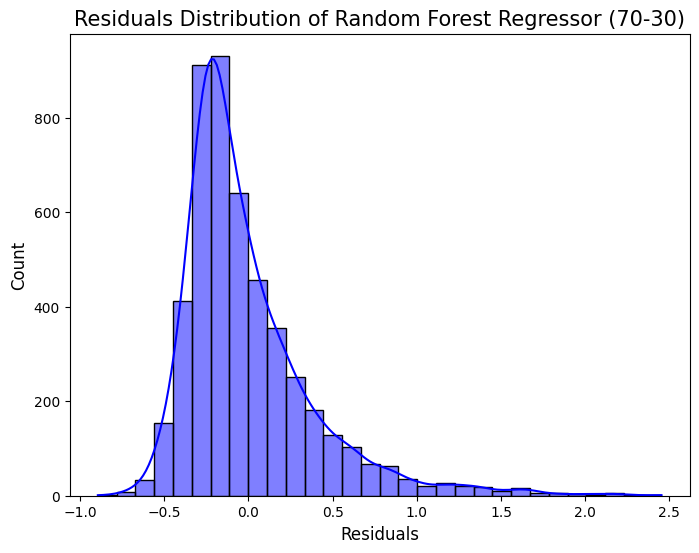

In [21]:
# Performance evalueation for model random forest regressor
# per_eval(rfr_grid,y_test, 'Random Forest Regressor (50-50)')
per_eval(rfr_grid,y_test, 'Random Forest Regressor (70-30)')
# per_eval(rfr_grid,y_test, 'Random Forest Regressor (90-10)')



/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_9947/1592581184.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_features, x='index', y='importance', palette='viridis')


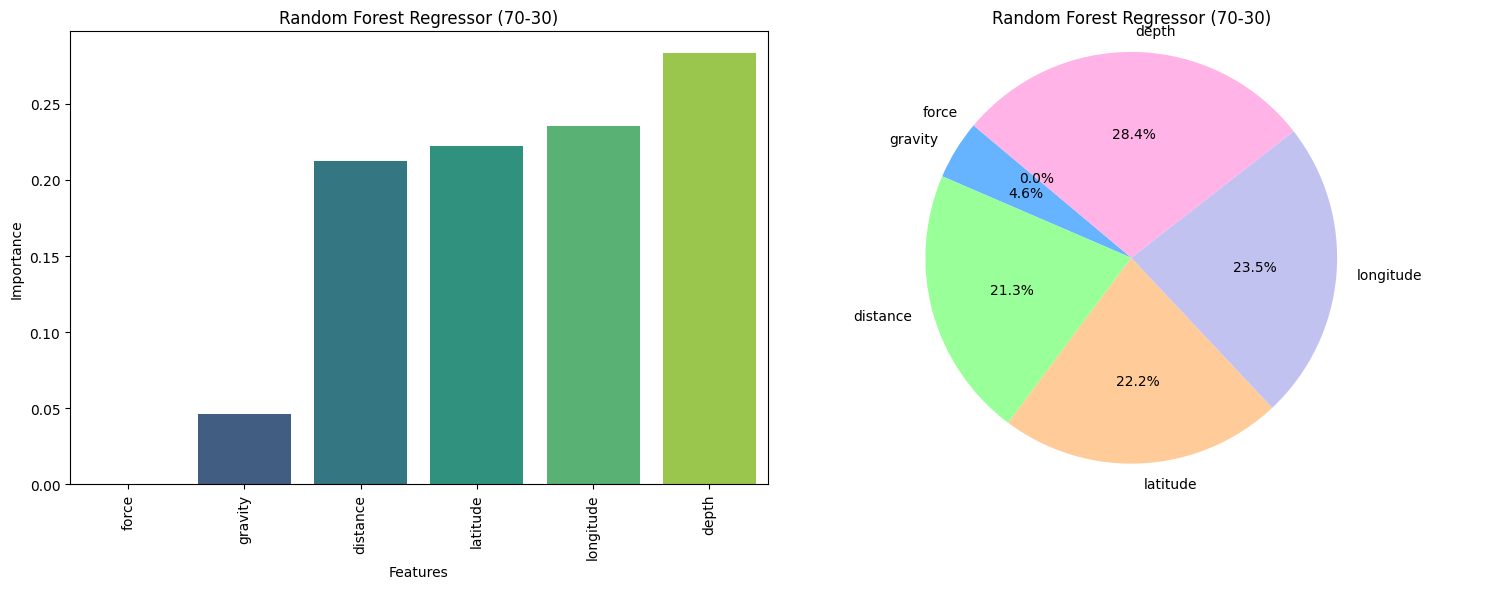

In [22]:
# Feature evaluation for boost random forest regressor
# fea_eval_1(rfr_grid, X, 'Random Forest Regressor (50-50)')
fea_eval_1(rfr_grid, X, 'Random Forest Regressor (70-30)')
# fea_eval_1(rfr_grid, X, 'Random Forest Regressor (90-10)')

#### Grident boost regresser

Model Evaluation: Gradient Boosting Regressor(70-30)
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score from cross-validation:  -0.15167188984735933
MAE: 0.2826657642319078
MSE: 0.15178406188279683
RMSE: 0.3895947405738389
R^2 Score: 0.08715389184464784


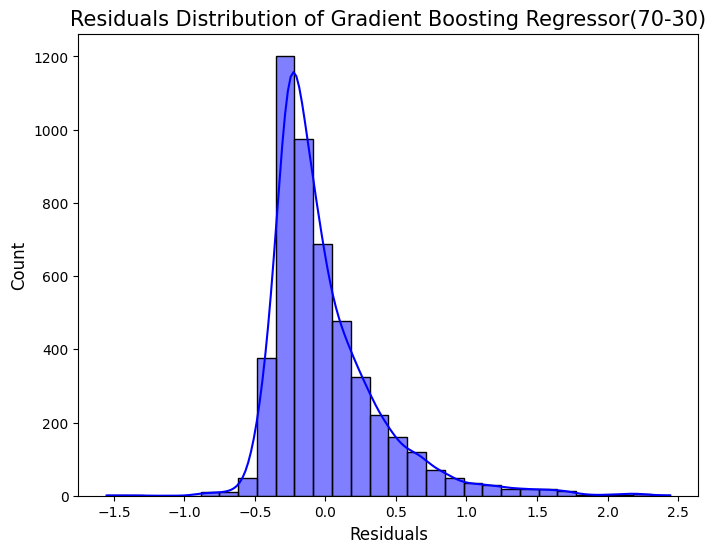

In [23]:
# Performance evalueation for gradient boost regressor
# per_eval(gbr_grid,y_test, 'Gradient Boosting Regressor(50-50)')
per_eval(gbr_grid,y_test, 'Gradient Boosting Regressor(70-30)')
# per_eval(gbr_grid,y_test, 'Gradient Boosting Regressor(90-10)')


/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_9947/1592581184.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_features, x='index', y='importance', palette='viridis')


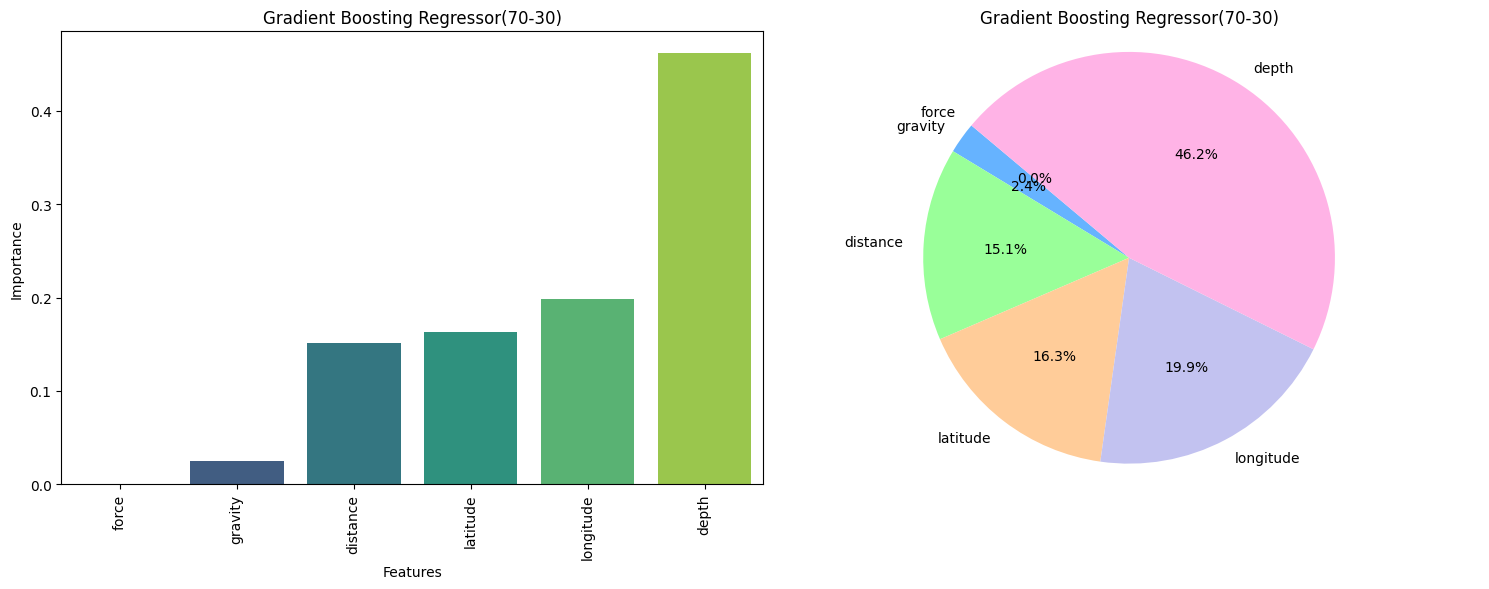

In [24]:
# Feature evaluation for boost regressor
# fea_eval_1(gbr_grid, X, 'Gradient Boosting Regressor(50-50)')
fea_eval_1(gbr_grid, X, 'Gradient Boosting Regressor(70-30)')
# fea_eval_1(gbr_grid, X, 'Gradient Boosting Regressor(90-10)')

#### KNeighbors Regressor

Model Evaluation: KNeighborsRegressor(70-30)
Best parameters found:  {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best score from cross-validation:  -0.17643193391075923
MAE: 0.3113057664682948
MSE: 0.17904096470346814
RMSE: 0.4231323252878089
R^2 Score: -0.07677213142537842


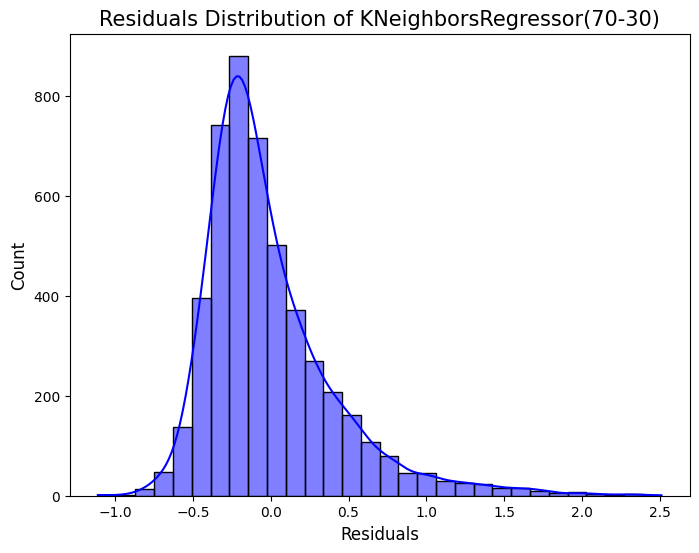

In [25]:
# per_eval(knr_grid, y_test, 'KNeighborsRegressor(50-50)')
per_eval(knr_grid, y_test, 'KNeighborsRegressor(70-30)')
# per_eval(knr_grid, y_test, 'KNeighborsRegressor(90-10)')

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_9947/1592581184.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_features, x='index', y='importance', palette='viridis')


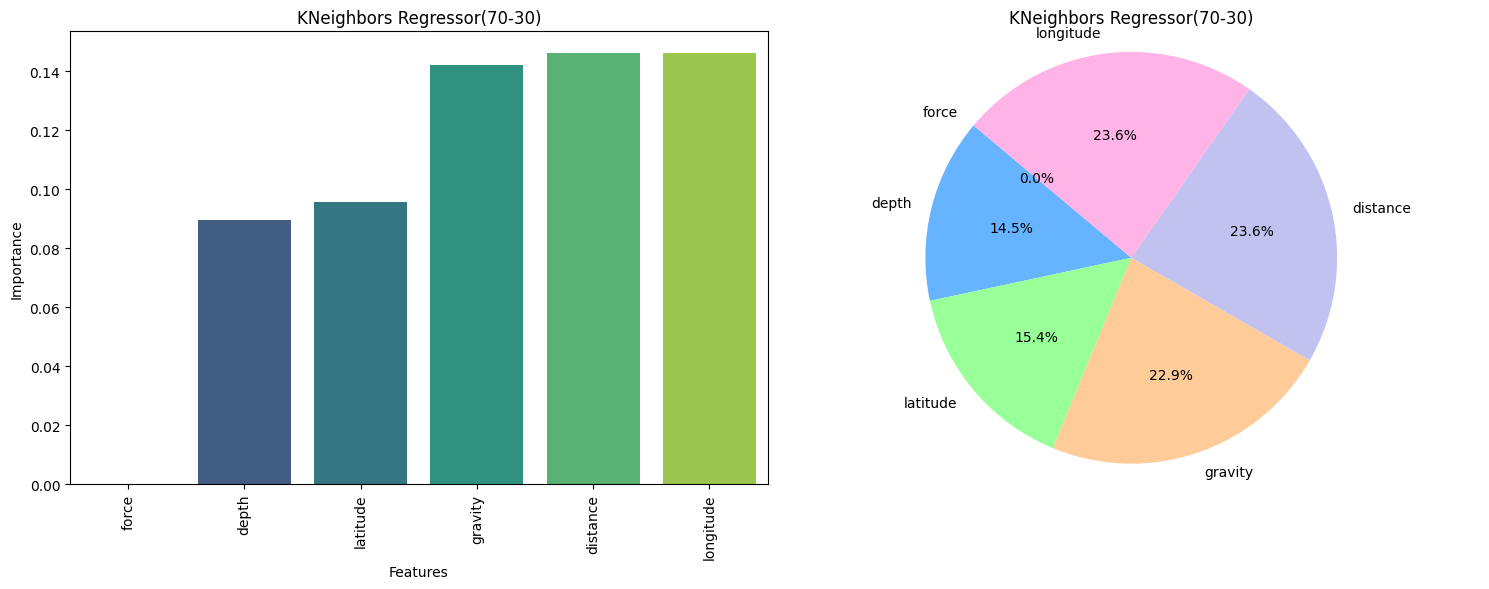

In [26]:
# fea_eval_2(knr_grid, X_train, y_train, X.columns, 'KNeighbors Regressor(50-50)')
fea_eval_2(knr_grid, X_train, y_train, X.columns, 'KNeighbors Regressor(70-30)')
# fea_eval_2(knr_grid, X_train, y_train, X.columns, 'KNeighbors Regressor(90-10)')


#### MLP Regressor

Model Evaluation: MLP Regressor (70-30)
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'max_iter': 800, 'solver': 'adam'}
Best score from cross-validation:  -0.16432666008760938
MAE: 0.29796015699262424
MSE: 0.16365800697339086
RMSE: 0.4045466684739733
R^2 Score: 0.01574267494910353


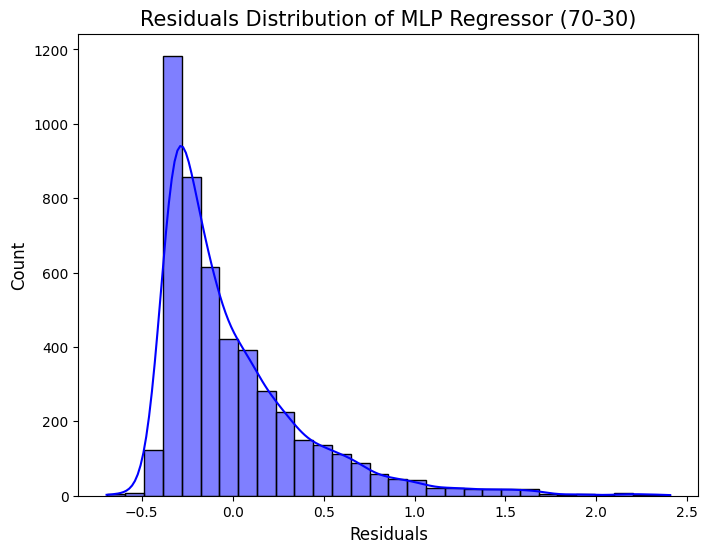

In [27]:
# per_eval(mlp_grid, y_test, 'MLP Regressor (50-50)')
per_eval(mlp_grid, y_test, 'MLP Regressor (70-30)')
# per_eval(mlp_grid, y_test, 'MLP Regressor (90-10)')


/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_9947/1592581184.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_features, x='index', y='importance', palette='viridis')


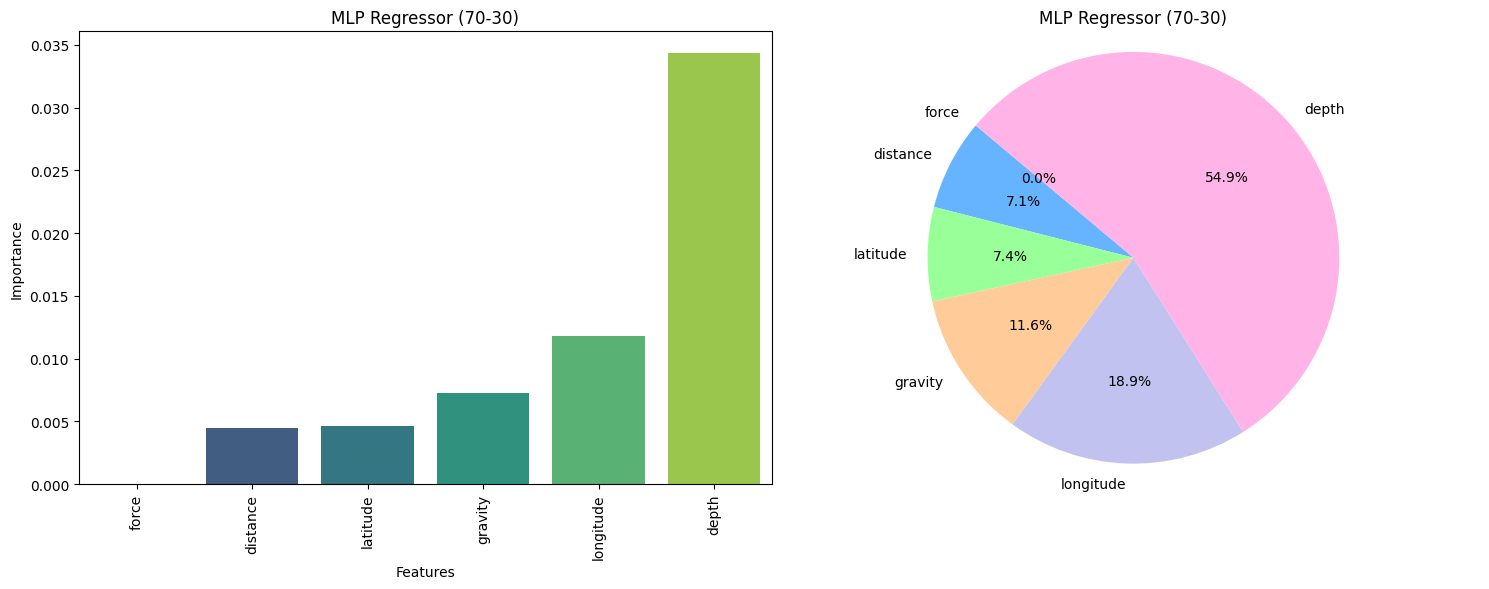

In [28]:


# fea_eval_2(mlp_grid, X_train, y_train, X.columns,'MLP Regressor (50-50)')
fea_eval_2(mlp_grid, X_train, y_train, X.columns,'MLP Regressor (70-30)')
# fea_eval_2(mlp_grid, X_train, y_train, X.columns,'MLP Regressor (90-10)')


In [29]:
# this function is to evaluate features
def comb_feat_1(grid, X):
    # Extract feature importances from the best estimator found by GridSearchCV
    imp_feat = grid.best_estimator_.feature_importances_  
    
    # Create a DataFrame to store the important features and their importances
    important_features = pd.DataFrame(index=X.columns, data=imp_feat, columns=['importance']).reset_index()
    
    # Sort the features by importance in ascending order
    return important_features.sort_values(by='importance', ascending=True).reset_index()
# model 2 for feature evaluation 
def comb_feat_2(grid, X, y, feature_names):
    # Extract the best model from GridSearchCV
    best_model = grid.best_estimator_
    
    # Compute permutation feature importance
    perm_importance = permutation_importance(best_model, X, y, random_state=42)
    
    # Create a DataFrame to store the important features and their importances
    important_features = pd.DataFrame(index=feature_names, data=perm_importance.importances_mean, columns=['importance']).reset_index()
    
    # Sort the features by importance in ascending order
    return important_features.sort_values(by='importance', ascending=True).reset_index(drop=True)

In [30]:

title = 'on 45-45 data.'

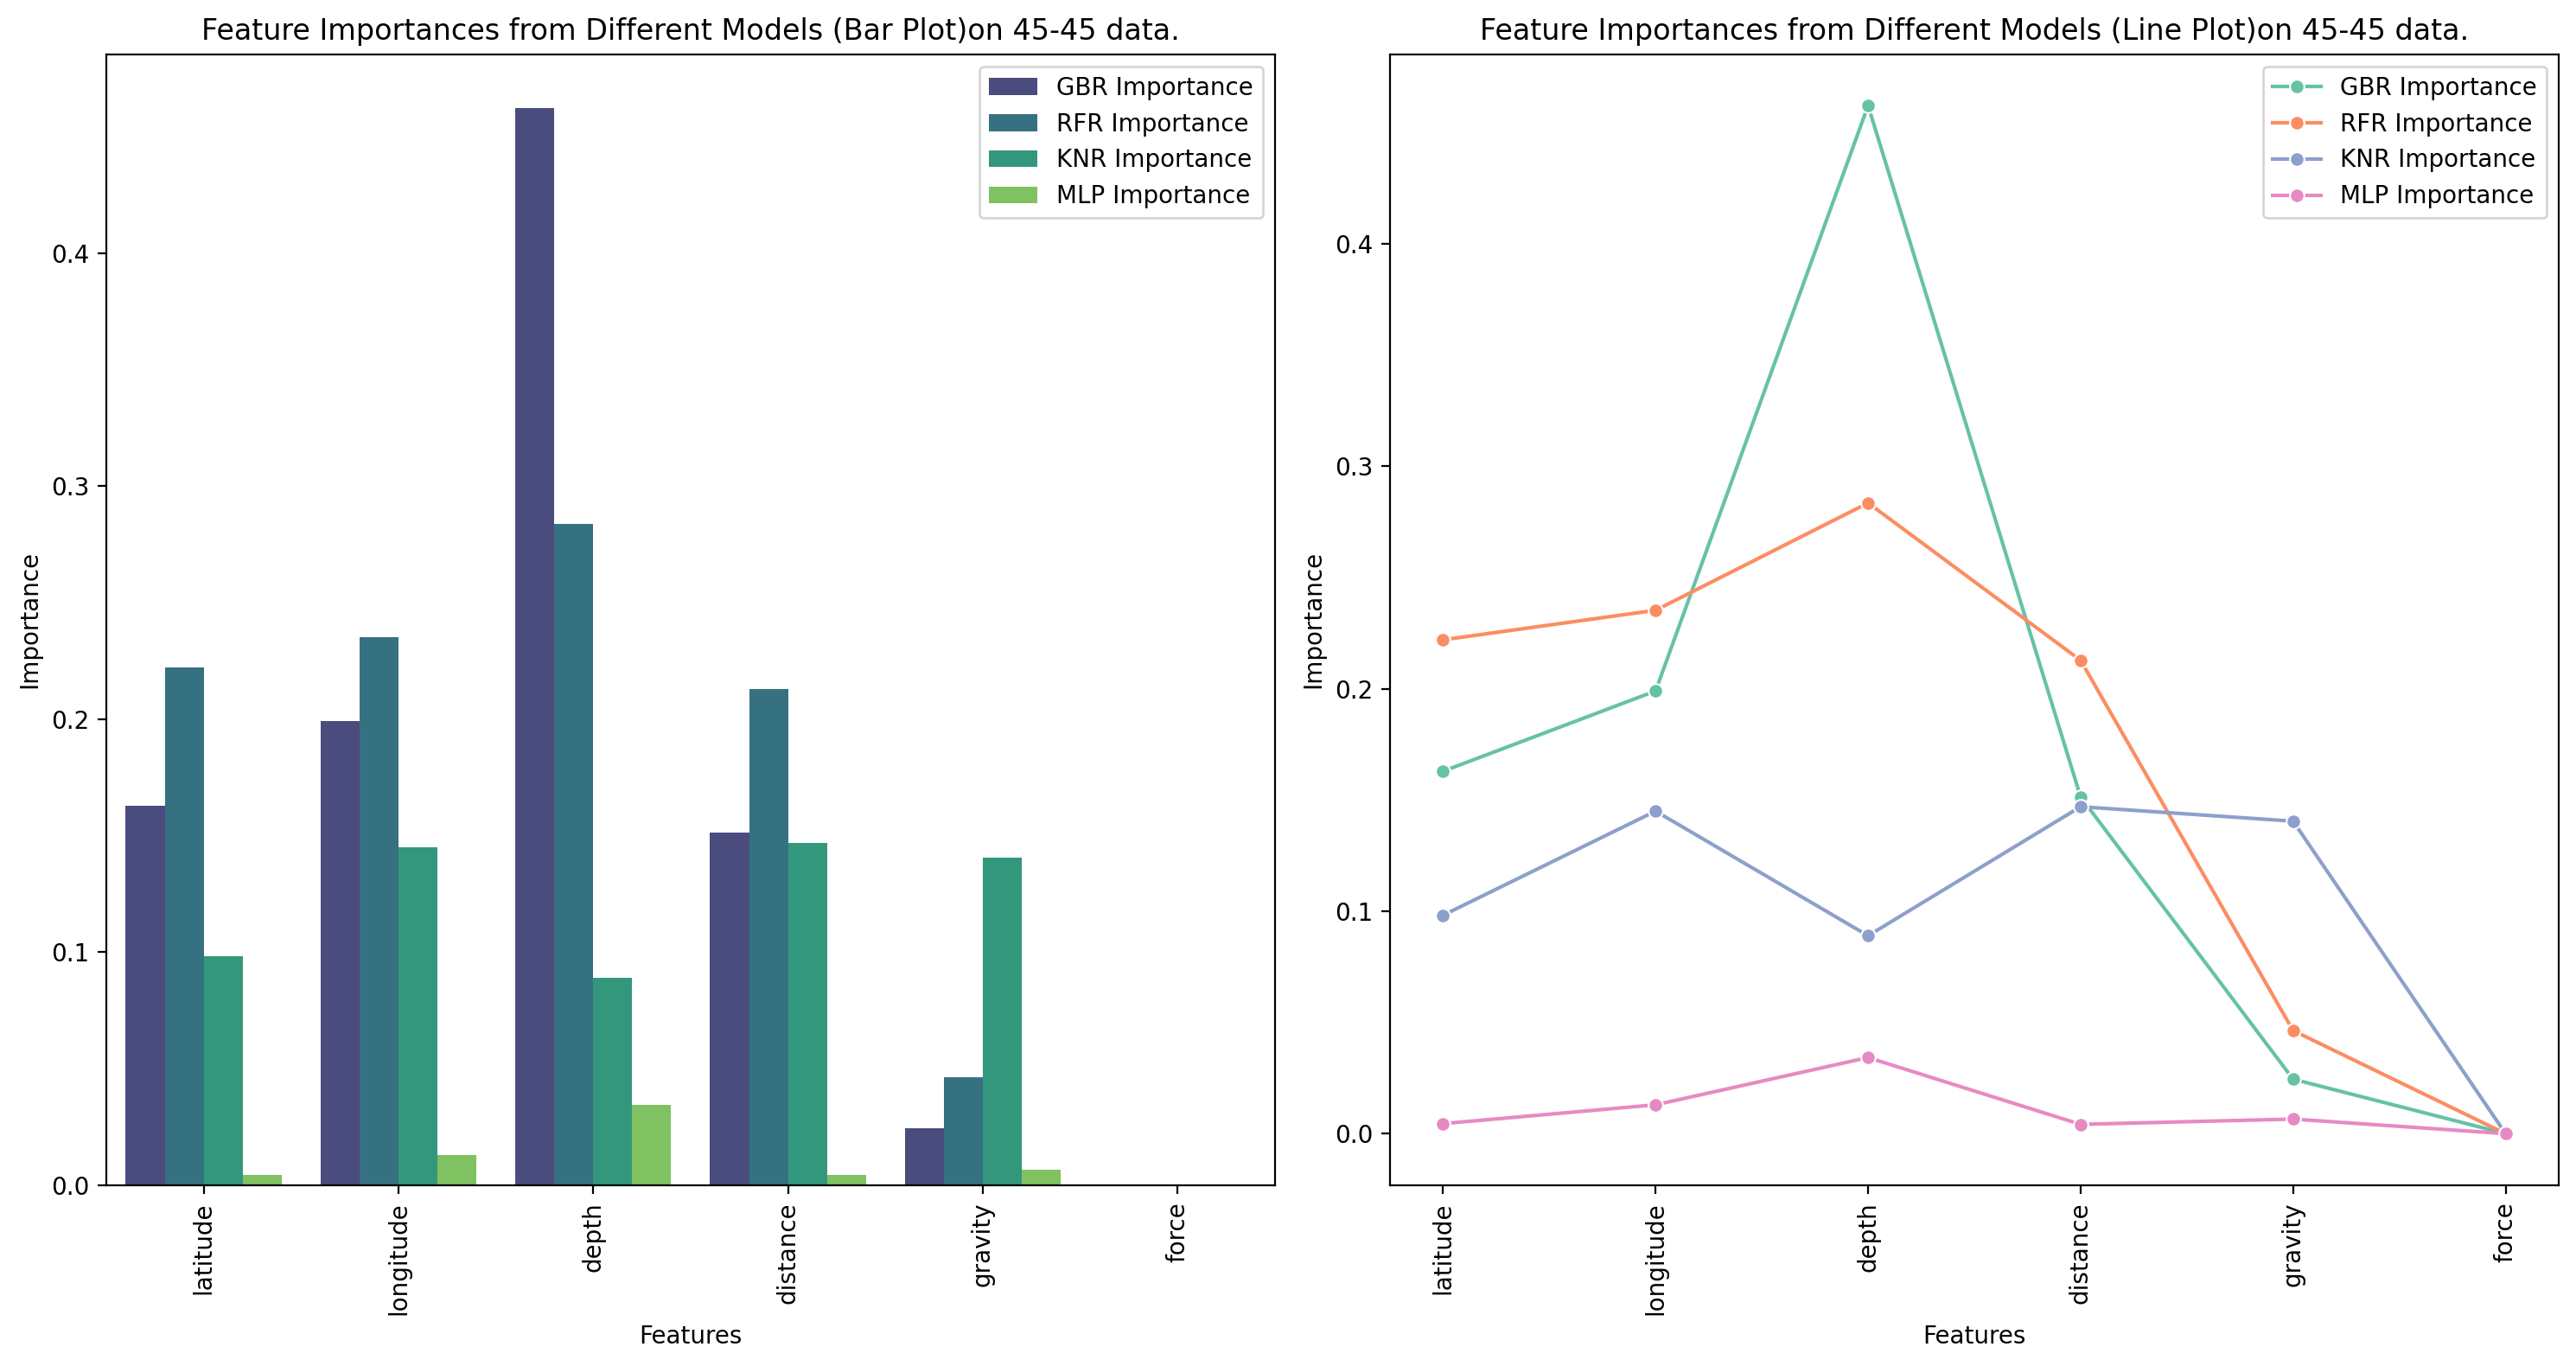

In [31]:
# Custom function for models with feature_importances_ attribute
def comb_feat_1(grid, X, model_name):
    imp_feat = grid.best_estimator_.feature_importances_
    important_features = pd.DataFrame(data={'Feature': X.columns, f'{model_name} Importance': imp_feat})
    return important_features

# Custom function using permutation importance
def comb_feat_2(grid, X, y, feature_names, model_name):
    best_model = grid.best_estimator_
    perm_importance = permutation_importance(best_model, X, y, n_repeats=10, random_state=42)
    important_features = pd.DataFrame(data={'Feature': feature_names, f'{model_name} Importance': perm_importance.importances_mean})
    return important_features

# Get feature importances from each model
gbr_importances = comb_feat_1(gbr_grid, X, 'GBR')
rfr_importances = comb_feat_1(rfr_grid, X, 'RFR')
knr_importances = comb_feat_2(knr_grid, X_train, y_train, X.columns, 'KNR')
mlp_importances = comb_feat_2(mlp_grid, X_train, y_train, X.columns, 'MLP')

# Merge the results
combined_importances = gbr_importances.merge(rfr_importances, on='Feature').merge(knr_importances, on='Feature').merge(mlp_importances, on = 'Feature')


plt.figure(figsize=(15, 8), dpi = 200)

# Melting the DataFrame for better visualization with seaborn
melted_importances = combined_importances.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Subplot 1: Grouped bar plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(data=melted_importances, x='Feature', y='Importance', hue='Model', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Feature Importances from Different Models (Bar Plot){title}')
plt.legend(loc='upper right')
plt.tight_layout()

# Subplot 2: Line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.lineplot(data=melted_importances, x='Feature', y='Importance', hue='Model', palette='Set2', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Feature Importances from Different Models (Line Plot){title}')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f'./featur_important/{title}.png')
plt.show()

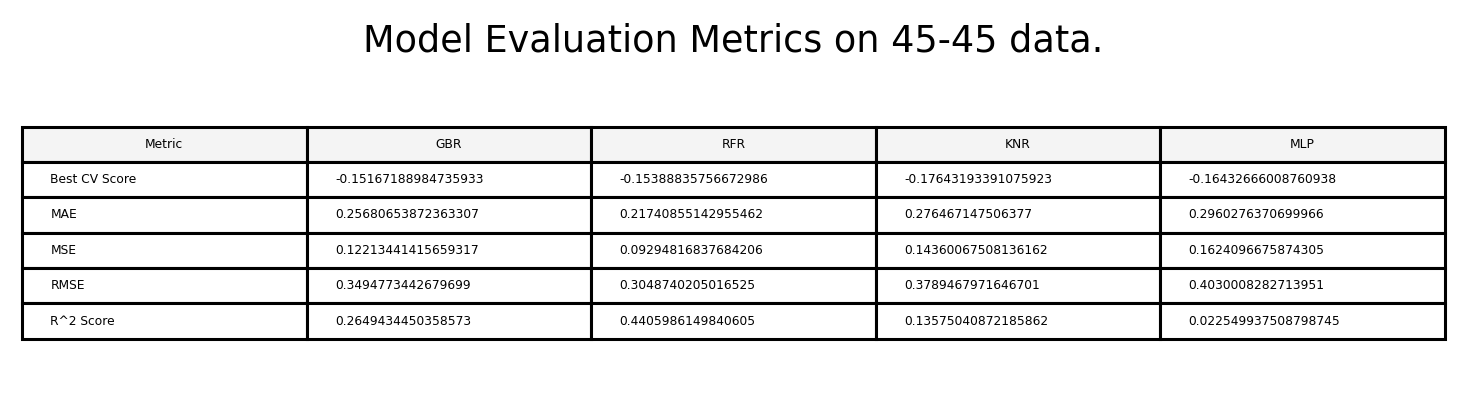

In [32]:
def print_model_evaluation(grid, X, y, title):
    best_model = grid.best_estimator_
    predictions = best_model.predict(X)
    
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    
    metrics = {
        'Metric': ['Best CV Score', 'MAE', 'MSE', 'RMSE', 'R^2 Score'],
        title: [
            grid.best_score_,
            mae,
            mse,
            rmse,
            r2
        ]
    }
    
    return pd.DataFrame(metrics)

gbr_metrics = print_model_evaluation(gbr_grid, X_train, y_train, 'GBR')
rfr_metrics = print_model_evaluation(rfr_grid, X_train, y_train, 'RFR')
knr_metrics = print_model_evaluation(knr_grid, X_train, y_train, 'KNR')
mlp_metrics = print_model_evaluation(mlp_grid, X_train, y_train, 'MLP')



# Combine the metrics
combined_metrics = gbr_metrics.merge(rfr_metrics, on='Metric').merge(knr_metrics, on='Metric').merge(mlp_metrics, on='Metric')

# Subplot 3: Table plot
plt.figure(figsize=(20,2), dpi = 220)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.axis('off')
plt.table(cellText=combined_metrics.values, colLabels=combined_metrics.columns, cellLoc='left', loc='center', colColours=["#f4f4f4"]*combined_metrics.shape[1])
# tbl.auto_set_font_size(True)
# tbl.scale(1.2, 1.2)
plt.title(f'Model Evaluation Metrics {title}')
plt.tight_layout()
# plt.savefig("Model Evaluation Metrics on 50-50 data.png")
plt.show()